## ML Classification Assignment 

We are working as part of a company (Yojo.com),which operates in the online shopping industry. One of the key points of emphasis in Yojo's digital business strategy is monitoring their client's satisfaction rate by performing satisfactions surveys that measure different aspects of the purchase process.

Now, the main focus point of this project will be the development of a process to most  accuratelly predict customer satisfaction, based on a data collected on historical opinions of the customers and the characteristics of their purchases.




In [47]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing

In [48]:
df = pd.read_csv('model.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Price,NewUsed,Category,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Shipping delay in days,Arrival delay in days,Satisfaction
0,0,139Q880b,Female,Premium,60.0,37.66,New,Entertainment,4,4,2,4,3,5,3,4,2,0,0,Not Satisfied
1,1,513F768p,Female,Premium,57.0,331.90,New,Technology,1,1,3,5,5,5,4,5,5,0,0,Satisfied
2,2,933T167j,Female,Premium,38.0,311.06,New,Technology,3,3,5,5,5,4,1,5,5,0,0,Satisfied
3,3,193N829g,Male,Premium,NaN,85.14,New,Technology,5,5,3,2,5,4,5,1,3,0,0,Not Satisfied
4,4,661I898j,Male,Premium,37.0,23.15,New,Entertainment,1,1,5,1,3,3,2,2,5,0,0,Satisfied


## Dataset

This is the first dataset related to customer's characteristics and purchase information, with a respectfull target variable focusing on the binary outcome of the satisfaction level (Satisfied or Not). We are going to use this data for EDA perpuses and to create and evaluate a model that will predict this binary outcome for future clients with these attributes.

This is the attribute information of all data contained in the above dataset. It is important that this table is present in the coding script, to always have a clear visual on the data that we will be using during our analysis.





## Data Exploration

#### First I believe it is important to examine our target/ output collumn related to the satisfaction level of customers based on the historic data available to us from our dataset.

In [49]:
df['Satisfaction'].value_counts()

Not Satisfied    29498
Satisfied        20502
Name: Satisfaction, dtype: int64

#### Here we can easily notice at a first glance that 59% of our previous clients were not satisfied and 41% were satisfied. That is valuable information to have moving forward, without though inserting any bias to our analysis.

In [50]:
df.isnull().sum()/df.count()*100

Unnamed: 0                            0.000000
id                                    0.000000
Gender                                0.000000
Customer Type                         0.000000
Age                                   8.384635
Price                                 0.000000
NewUsed                               0.000000
Category                              0.000000
Product description accuracy          0.000000
Manufacturer sustainability           0.000000
Packaging quality                     0.000000
Additional options                    0.000000
Helpfulness of reviews and ratings    0.000000
Integrity of packaging                0.000000
Ease check-out procedure              0.000000
Relevance of related products         0.000000
Costumer insurance                    0.000000
Shipping delay in days                0.000000
Arrival delay in days                 0.000000
Satisfaction                          0.000000
dtype: float64

In [51]:
df.isna().any()

Unnamed: 0                            False
id                                    False
Gender                                False
Customer Type                         False
Age                                    True
Price                                 False
NewUsed                               False
Category                              False
Product description accuracy          False
Manufacturer sustainability           False
Packaging quality                     False
Additional options                    False
Helpfulness of reviews and ratings    False
Integrity of packaging                False
Ease check-out procedure              False
Relevance of related products         False
Costumer insurance                    False
Shipping delay in days                False
Arrival delay in days                 False
Satisfaction                          False
dtype: bool

In [52]:
df.isna().sum()/df.count()*100

Unnamed: 0                            0.000000
id                                    0.000000
Gender                                0.000000
Customer Type                         0.000000
Age                                   8.384635
Price                                 0.000000
NewUsed                               0.000000
Category                              0.000000
Product description accuracy          0.000000
Manufacturer sustainability           0.000000
Packaging quality                     0.000000
Additional options                    0.000000
Helpfulness of reviews and ratings    0.000000
Integrity of packaging                0.000000
Ease check-out procedure              0.000000
Relevance of related products         0.000000
Costumer insurance                    0.000000
Shipping delay in days                0.000000
Arrival delay in days                 0.000000
Satisfaction                          0.000000
dtype: float64

 #### After executing the above two commands we can notice that we dont have any null or NaN values in our attributes, outside age (we have 8% missing values in the age collumn, that we decided is not affecting the perpuses of the analysis). So we will replace NaN values with the AVG of the Age, because I do not think that this will affect our analysis. (We calculated the presentage of the missing values)

In [53]:
df['Age'].fillna(value=df['Age'].mean(), inplace=True)

In [54]:
df.isna().sum()/df.count()*100

Unnamed: 0                            0.0
id                                    0.0
Gender                                0.0
Customer Type                         0.0
Age                                   0.0
Price                                 0.0
NewUsed                               0.0
Category                              0.0
Product description accuracy          0.0
Manufacturer sustainability           0.0
Packaging quality                     0.0
Additional options                    0.0
Helpfulness of reviews and ratings    0.0
Integrity of packaging                0.0
Ease check-out procedure              0.0
Relevance of related products         0.0
Costumer insurance                    0.0
Shipping delay in days                0.0
Arrival delay in days                 0.0
Satisfaction                          0.0
dtype: float64

In [55]:
df.dtypes

Unnamed: 0                              int64
id                                     object
Gender                                 object
Customer Type                          object
Age                                   float64
Price                                 float64
NewUsed                                object
Category                               object
Product description accuracy            int64
Manufacturer sustainability             int64
Packaging quality                       int64
Additional options                      int64
Helpfulness of reviews and ratings      int64
Integrity of packaging                  int64
Ease check-out procedure                int64
Relevance of related products           int64
Costumer insurance                      int64
Shipping delay in days                  int64
Arrival delay in days                   int64
Satisfaction                           object
dtype: object

#### Above we identify which collumns are numerical and categorical

In [56]:
df.describe()

,Unnamed: 0,Age,Price,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Shipping delay in days,Arrival delay in days
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,24999.500000,41.601817,118.785945,3.061120,2.977920,3.190460,3.36630,3.335460,3.621360,3.300540,3.632180,3.271140,0.110160,0.112240
std,14433.901067,13.000549,99.695572,1.527177,1.277241,1.333109,1.28934,1.316481,1.181296,1.266605,1.175362,1.315727,0.412393,0.415121
min,0.000000,18.000000,1.020000,0.000000,1.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12499.750000,31.000000,42.560000,2.000000,2.000000,2.000000,2.00000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,24999.500000,41.601817,84.395000,3.000000,3.000000,3.000000,4.00000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,37499.250000,51.000000,172.600000,4.000000,4.000000,4.000000,4.00000,4.000000,5.000000,4.000000,5.000000,4.000000,0.000000,0.000000
max,49999.000000,85.000000,540.630000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,16.000000,16.000000


 #### Looking at the summary above we want to test the two continous numerical attributes that we have for outliers. We can notice that for the Age column we have no outliers since the min and max values are completely reasonable (18 and 85 respectively). That was easy to detect. Now we have to check for the price and the arrival and shipping delay, where we see that we had an incident of a 16 days delay.

array([[<AxesSubplot:title={'center':'Arrival delay in days'}>]],
      dtype=object)

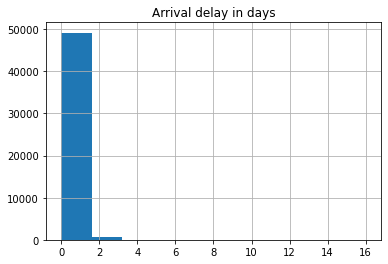

In [57]:
df.hist(column='Arrival delay in days')

#### The histogram cant help us to detect the number of outliers regarding the arrival delay in days, so we are going to do a scatter plot

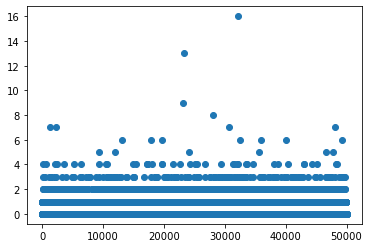

In [58]:
plt.scatter(df["Unnamed: 0"],df["Arrival delay in days"])

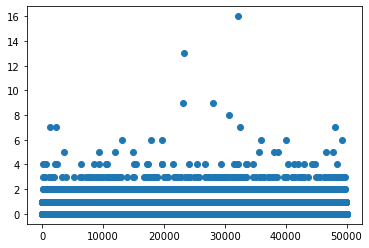

In [59]:
plt.scatter(df["Unnamed: 0"],df["Shipping delay in days"])

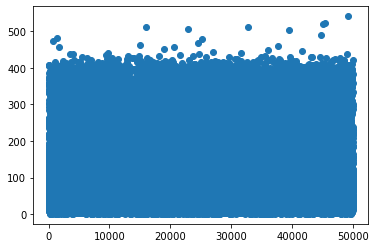

In [60]:
plt.scatter(df["Unnamed: 0"],df["Price"])

#### Below are the commands used to remove the outliers for the 3 attributes. The reason I am not including that to the code is because I was having disproposional index with df rows, after dropping this values, although I was using the df.dropna command. So I decided to not remove them and keep working on the analysis

In [61]:
#index = df[(df['Arrival delay in days'] >= 4)].index
#df.drop(index, inplace=True)
#df['Arrival delay in days'].describe()

#index = df[(df['Shipping delay in days'] >= 4)].index
#df.drop(index, inplace=True)
#df['Shipping delay in days'].describe()

#index = df[(df['Shipping delay in days'] >= 4)].index
#df.drop(index, inplace=True)
#df['Shipping delay in days'].describe()



#### Then we will create two more dataframes to split our initial dataset to attributes that are numerical and attributes that are categorical. This will help us do transformations on the variables where is necessary in order to prepare the data for model implimentation

In [62]:
df_categorical=df.select_dtypes(include=['object'])
df_categorical.tail()

,id,Gender,Customer Type,NewUsed,Category,Satisfaction
49995,679X543x,Female,Premium,New,Home/Kitchen,Not Satisfied
49996,110V745c,Female,Premium,New,Technology,Not Satisfied
49997,350E543w,Male,Premium,New,Home/Kitchen,Not Satisfied
49998,685B2d60,Male,Premium,New,Entertainment,Not Satisfied
49999,864W801x,Male,Not Premium,New,Technology,Satisfied


In [63]:
df_numerical=df.select_dtypes(include=['int64', 'float64'])

df_numerical.tail()


,Unnamed: 0,Age,Price,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Shipping delay in days,Arrival delay in days
49995,49995,29.0,156.42,1,1,3,3,4,3,1,3,3,0,0
49996,49996,28.0,20.03,3,3,5,1,4,4,2,4,5,0,0
49997,49997,28.0,70.41,5,1,4,1,1,5,4,4,4,0,0
49998,49998,35.0,98.82,4,4,1,2,2,2,3,2,3,0,0
49999,49999,21.0,38.54,3,4,4,2,3,1,1,2,4,0,0


#### Then we will create dummies  for our categorical variables

Gender: Female = 0 , Male = 1

Customer_Type_Premium: Premium = 1, Standard = 0

NewUsed : New = 0 , Used = 1

Category : 

Satisfaction : Satisfied = 1 , Not_Satisfied = 0

In [64]:
df_categorical=df.select_dtypes(include=['object'])
df_categorical.head()

,id,Gender,Customer Type,NewUsed,Category,Satisfaction
0,139Q880b,Female,Premium,New,Entertainment,Not Satisfied
1,513F768p,Female,Premium,New,Technology,Satisfied
2,933T167j,Female,Premium,New,Technology,Satisfied
3,193N829g,Male,Premium,New,Technology,Not Satisfied
4,661I898j,Male,Premium,New,Entertainment,Satisfied


#### We will replace all ordinal and binary categorical variables with dummies

In [65]:
dummies = pd.get_dummies(df_categorical[['Gender', 'Customer Type', 'NewUsed','Category', 'Satisfaction']],drop_first=True) 
dummies.head()

,Gender_Male,Customer Type_Premium,NewUsed_Used,Category_Home/Kitchen,Category_Other,Category_Sport,Category_Technology,Satisfaction_Satisfied
0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,1,1
2,0,1,0,0,0,0,1,1
3,1,1,0,0,0,0,1,0
4,1,1,0,0,0,0,0,1


array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Product description accuracy'}>],
       [<AxesSubplot:title={'center':'Manufacturer sustainability'}>,
        <AxesSubplot:title={'center':'Packaging quality'}>,
        <AxesSubplot:title={'center':'Additional options'}>,
        <AxesSubplot:title={'center':'Helpfulness of reviews and ratings'}>],
       [<AxesSubplot:title={'center':'Integrity of packaging'}>,
        <AxesSubplot:title={'center':'Ease check-out procedure'}>,
        <AxesSubplot:title={'center':'Relevance of related products'}>,
        <AxesSubplot:title={'center':'Costumer insurance'}>],
       [<AxesSubplot:title={'center':'Shipping delay in days'}>,
        <AxesSubplot:title={'center':'Arrival delay in days'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

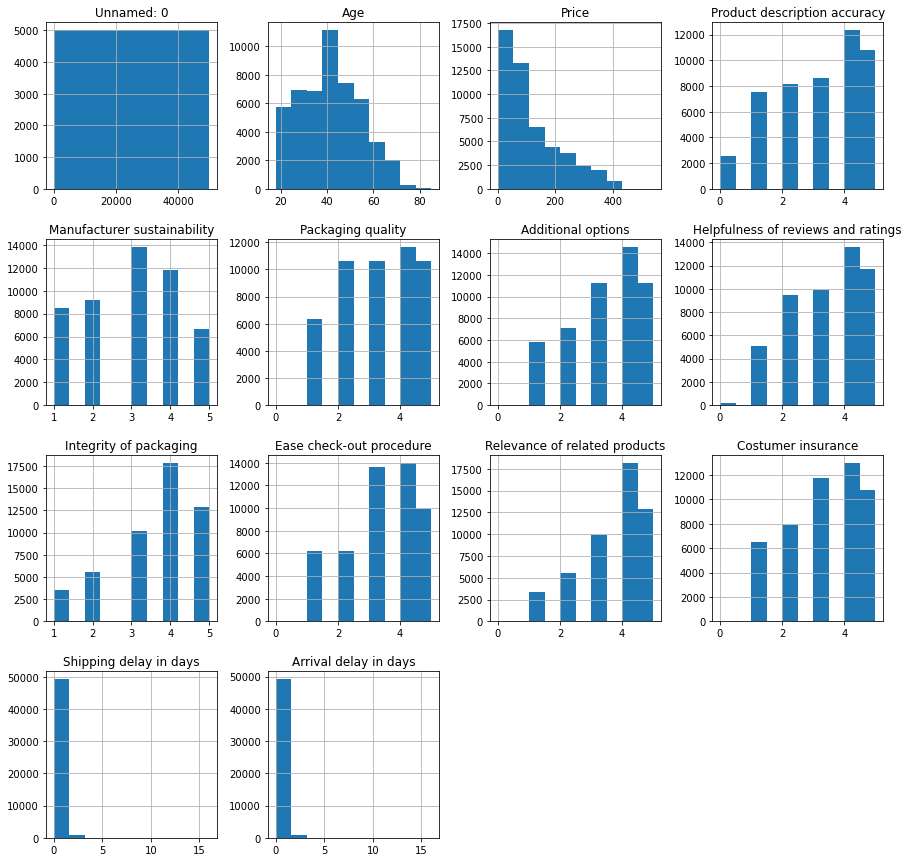

In [66]:
df_numerical.hist(figsize=(15,15))

#### After implementing histogram represenation of the numerical attributes, we can observe the right skewed Price graph and further proceed with implementing log transformation to this specific attribute before moving forward

In [67]:
import math
pd.options.mode.chained_assignment = None

df_numerical['logprice']=df_numerical['Price'].apply(math.log)


In [68]:
df_numerical.head()

,Unnamed: 0,Age,Price,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Shipping delay in days,Arrival delay in days,logprice
0,0,60.000000,37.66,4,4,2,4,3,5,3,4,2,0,0,3.628599
1,1,57.000000,331.90,1,1,3,5,5,5,4,5,5,0,0,5.804834
2,2,38.000000,311.06,3,3,5,5,5,4,1,5,5,0,0,5.739986
3,3,41.601817,85.14,5,5,3,2,5,4,5,1,3,0,0,4.444297
4,4,37.000000,23.15,1,1,5,1,3,3,2,2,5,0,0,3.141995


array([[<AxesSubplot:title={'center':'logprice'}>]], dtype=object)

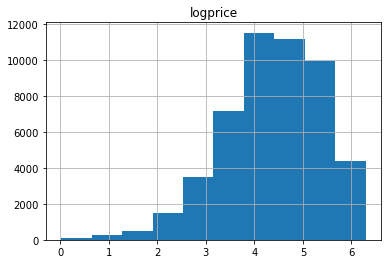

In [69]:
df_numerical.hist(column='logprice')

### Standardization


The ultimate goal to perform standardization is to bring down all the features to a common scale without distorting the differences in the range of the values.
Differences in the ranges of initial features causes trouble to many machine learning models. For example, for the models that are based on distance computation, if one of the features has a broad range of values, the distance will be governed by this particular feature.

k-nearest neighbors is a distance based classifier that classifies new observations based on similarity measures (e.g., distance metrics) with labeled observations of the training set. Standardization makes all variables to contribute equally to the similarity measures.

Logistic Regression and Tree based algorithms such as Decision Tree, Random forest and gradient boosting, are not sensitive to the magnitude of variables. So standardization is not needed before fitting this kind of models.

We are creating an object below and we apply the transformation that this object can do to the training data. The scaler object will remember the transformation that we did to all of the columns, if we want to use it for future new data.

In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(df_numerical)
scaled_df = pd.DataFrame(scaler.transform(df_numerical))
scaled_df.columns = df_numerical.columns

scaled_df.head()

,Unnamed: 0,Age,Price,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Shipping delay in days,Arrival delay in days,logprice
0,-1.732016,1.415199e+00,-0.813745,0.614787,0.800233,-0.893004,0.491497,-0.254818,1.167069,-0.237282,0.312945,-0.966122,-0.267126,-0.270382,-0.732875
1,-1.731947,1.184437e+00,2.137670,-1.349641,-1.548603,-0.142870,1.267095,1.264399,1.167069,0.552238,1.163755,1.314009,-0.267126,-0.270382,1.429179
2,-1.731878,-2.770539e-01,1.928631,-0.040022,0.017287,1.357397,1.267095,1.264399,0.320533,-1.816323,1.163755,1.314009,-0.267126,-0.270382,1.364754
3,-1.731808,-5.465537e-16,-0.337490,1.269597,1.583178,-0.142870,-1.059700,1.264399,0.320533,1.341758,-2.239485,-0.206078,-0.267126,-0.270382,0.077508
4,-1.731739,-3.539745e-01,-0.959289,-1.349641,-1.548603,1.357397,-1.835298,-0.254818,-0.526004,-1.026803,-1.388675,1.314009,-0.267126,-0.270382,-1.216308


In [71]:
scaled_df.describe()

,Unnamed: 0,Age,Price,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Shipping delay in days,Arrival delay in days,logprice
count,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04
mean,-3.790301e-17,-3.779821e-16,-1.655120e-17,-5.824757e-16,-3.914113e-16,-3.105560e-16,-1.840217e-16,2.994494e-17,-7.998047e-17,2.749712e-16,-2.547740e-16,7.733036e-16,-2.231373e-15,6.908962e-16,-1.279505e-15
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-1.732016e+00,-1.815466e+00,-1.181267e+00,-2.004450e+00,-1.548603e+00,-2.393271e+00,-2.610897e+00,-2.533644e+00,-2.219077e+00,-2.605843e+00,-3.090296e+00,-2.486209e+00,-2.671264e-01,-2.703816e-01,-4.318156e+00
25%,-8.660081e-01,-8.154981e-01,-7.645947e-01,-6.948312e-01,-7.656579e-01,-8.930039e-01,-1.059700e+00,-1.014427e+00,-5.260039e-01,-2.372824e-01,-5.378652e-01,-9.661219e-01,-2.671264e-01,-2.703816e-01,-6.113560e-01
50%,0.000000e+00,-5.465537e-16,-3.449631e-01,-4.002194e-02,1.728743e-02,-1.428704e-01,4.914967e-01,5.047903e-01,3.205326e-01,-2.372824e-01,3.129450e-01,-2.060782e-01,-2.671264e-01,-2.703816e-01,6.877643e-02
75%,8.660081e-01,7.229139e-01,5.397892e-01,6.147874e-01,8.002327e-01,6.072631e-01,4.914967e-01,5.047903e-01,1.167069e+00,5.522377e-01,1.163755e+00,5.539654e-01,-2.671264e-01,-2.703816e-01,7.795830e-01
max,1.732016e+00,3.338214e+00,4.231364e+00,1.269597e+00,1.583178e+00,1.357397e+00,1.267095e+00,1.264399e+00,1.167069e+00,1.341758e+00,1.163755e+00,1.314009e+00,3.853118e+01,3.827296e+01,1.913902e+00


<AxesSubplot:>

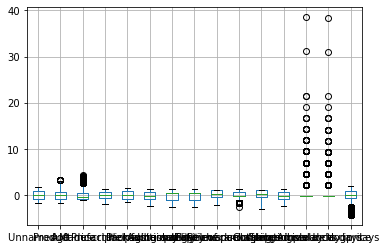

In [72]:
scaled_df.boxplot()

In [73]:
X_numerical=scaled_df[['Age','Product description accuracy','Manufacturer sustainability','Packaging quality','Additional options','Helpfulness of reviews and ratings','Integrity of packaging','Integrity of packaging','Ease check-out procedure','Relevance of related products','Costumer insurance','Shipping delay in days','Arrival delay in days','logprice']]
X_numerical.shape

(50000, 14)

Below I create a second dummies dataframe including only the independent variables, by basically removing the target variable from the initial dummies dataframe

In [74]:
dummies2 = dummies[['Gender_Male','Customer Type_Premium','NewUsed_Used','Category_Home/Kitchen','Category_Other','Category_Sport','Category_Technology']]
dummies2.shape

(50000, 7)

Then we are merging all the results of the transformations we did to both numerical and categorical variables, with the concat command

In [75]:
X=pd.concat([dummies2,X_numerical], axis = 1)
X.tail()

,Gender_Male,Customer Type_Premium,NewUsed_Used,Category_Home/Kitchen,Category_Other,Category_Sport,Category_Technology,Age,Product description accuracy,Manufacturer sustainability,...,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Shipping delay in days,Arrival delay in days,logprice
49995,0,1,0,1,0,0,0,-0.969339,-1.349641,-1.548603,...,-0.284102,0.504790,-0.526004,-0.526004,-1.816323,-0.537865,-0.206078,-0.267126,-0.270382,0.681792
49996,0,1,0,0,0,0,1,-1.046260,-0.040022,0.017287,...,-1.835298,0.504790,0.320533,0.320533,-1.026803,0.312945,1.314009,-0.267126,-0.270382,-1.360129
49997,1,1,0,1,0,0,0,-1.046260,1.269597,-1.548603,...,-1.835298,-1.774035,1.167069,1.167069,0.552238,0.312945,0.553965,-0.267126,-0.270382,-0.111216
49998,1,1,0,0,0,0,0,-0.507816,0.614787,0.800233,...,-1.059700,-1.014427,-1.372540,-1.372540,-0.237282,-1.388675,-0.206078,-0.267126,-0.270382,0.225540
49999,1,0,0,0,0,0,1,-1.584704,-0.040022,0.800233,...,-1.059700,-0.254818,-2.219077,-2.219077,-1.816323,-1.388675,0.553965,-0.267126,-0.270382,-0.709928


### Train / Test Split Data and Prepare for Data Modeling\


Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of our model overfitting.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split.
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that has been used to train the model. It is more realistic for real world problems.

In [76]:
y = dummies['Satisfaction_Satisfied']
y.shape

(50000,)

In [77]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30, #by default is 75%-25%
                                                    stratify=y, #preserve target propotions 
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape, X_test.shape)

(35000, 21) (15000, 21)


In [78]:
import sklearn as sk
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import f1_score

## KNN

The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.

To select the K that’s right for your data, we run the KNN algorithm several times with different values of K and choose the K that reduces the number of errors we encounter while maintaining the algorithm’s ability to accurately make predictions when it’s given data it hasn’t seen before.

As we increase the value of K, our predictions become more stable due to majority voting / averaging, and thus, more likely to make more accurate predictions (up to a certain point). Eventually, we begin to witness an increasing number of errors. It is at this point we know we have pushed the value of K too far.

In [79]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(14,1000,100)}

def hyperp_search(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=0, n_jobs=-1)
    gs = gs.fit(X_train, y_train)
    print("f1_train: %f using %s" % (gs.best_score_, gs.best_params_))

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)

    print("f1_test: ", f1_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

Testing a number of different K neighbours in order to choose the more apropriate one. We end up with choosing 14 K neighbours

In [80]:
hyperp_search(classifier,parameters)

f1_train: 0.767192 using {'n_neighbors': 14}
f1_test:  0.7705726872246697
[[8023  826]
 [1778 4373]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      8849
           1       0.84      0.71      0.77      6151

    accuracy                           0.83     15000
   macro avg       0.83      0.81      0.82     15000
weighted avg       0.83      0.83      0.82     15000



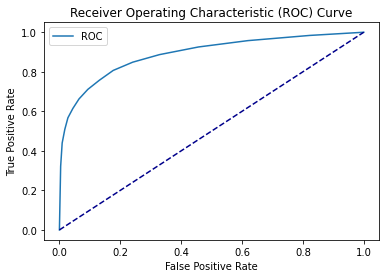

AUC: 0.89


In [81]:
model_knn = KNeighborsClassifier(n_neighbors=14)

def roc(model,X_train,y_train,X_test,y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

    fpr, tpr, thresholds1=metrics.roc_curve(y_test,  y_probs[:,1])

    import matplotlib.pyplot as plt
    plt.plot(fpr, tpr, label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    auc = metrics.roc_auc_score(y_test, y_probs[:,1])
    print('AUC: %.2f' % auc)
    return (fpr, tpr)

fpr1,tpr1=roc(model_knn,X_train,y_train,X_test,y_test)

### Dec Tree


In [82]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
parameters = {'criterion': ['entropy','gini'], 
              'max_depth': [4,5,10],
              'min_samples_split': [20],
              'min_samples_leaf': [10]}

hyperp_search(classifier,parameters)

f1_train: 0.772421 using {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 20}
f1_test:  0.776374956762366
[[7925  924]
 [1662 4489]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      8849
           1       0.83      0.73      0.78      6151

    accuracy                           0.83     15000
   macro avg       0.83      0.81      0.82     15000
weighted avg       0.83      0.83      0.83     15000



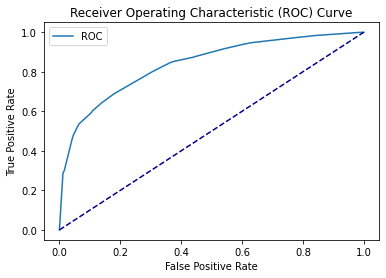

AUC: 0.84


In [83]:
model_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10, min_samples_split=20)

fpr2,tpr2=roc(model_tree,X_train,y_train,X_test,y_test)

In [84]:
from sklearn import tree
r = tree.export_text(model_tree,feature_names=X_test.columns.tolist(),max_depth=3)
print(r)

|--- Helpfulness of reviews and ratings <= 0.12
|   |--- Costumer insurance <= 0.17
|   |   |--- Product description accuracy <= -1.68
|   |   |   |--- logprice <= 0.19
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- logprice >  0.19
|   |   |   |   |--- truncated branch of depth 2
|   |   |--- Product description accuracy >  -1.68
|   |   |   |--- Ease check-out procedure <= -0.63
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- Ease check-out procedure >  -0.63
|   |   |   |   |--- truncated branch of depth 2
|   |--- Costumer insurance >  0.17
|   |   |--- logprice <= 0.87
|   |   |   |--- Age <= 1.45
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- Age >  1.45
|   |   |   |   |--- truncated branch of depth 2
|   |   |--- logprice >  0.87
|   |   |   |--- Ease check-out procedure <= -0.63
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- Ease check-out procedure >  -0.63
|   |   |   |   |--- truncated branch of dept

### Naive Bayes

In [85]:

from sklearn.naive_bayes import GaussianNB #or alternative NB implementations

model = GaussianNB()

model.fit(X_train, y_train)
y_pred=model.predict(X_test)

from sklearn.metrics import f1_score
print("f1_score: ", f1_score(y_test, y_pred))

print("f1_test: ", f1_score(y_test, y_pred))


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

f1_score:  0.6770476487075677
f1_test:  0.6770476487075677
[[6504 2345]
 [1803 4348]]
              precision    recall  f1-score   support

           0       0.78      0.73      0.76      8849
           1       0.65      0.71      0.68      6151

    accuracy                           0.72     15000
   macro avg       0.72      0.72      0.72     15000
weighted avg       0.73      0.72      0.72     15000



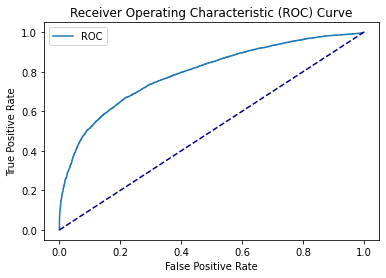

AUC: 0.79


In [86]:
y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr3,tpr3=roc(model,X_train,y_train,X_test,y_test)

### Logistic

In [87]:

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
parameters = {"C":[1e-4,1e-3,1e-2,1e-1,1,10], "max_iter":[1000] }


hyperp_search(classifier,parameters)

f1_train: 0.704221 using {'C': 10, 'max_iter': 1000}
f1_test:  0.7011258955987717
[[7386 1463]
 [2041 4110]]
              precision    recall  f1-score   support

           0       0.78      0.83      0.81      8849
           1       0.74      0.67      0.70      6151

    accuracy                           0.77     15000
   macro avg       0.76      0.75      0.75     15000
weighted avg       0.76      0.77      0.76     15000



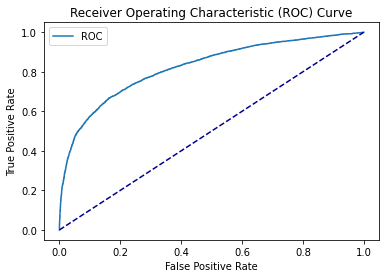

AUC: 0.82


In [88]:
model = LogisticRegression(C=1, max_iter=1000)

fpr4,tpr4=roc(model,X_train,y_train,X_test,y_test)

## SVM

In [89]:
from sklearn.svm import SVC

classifier = SVC()
parameters = {"kernel":['linear','rbf'], "C":[0.1,100]}

hyperp_search(classifier,parameters)

f1_train: 0.786678 using {'C': 100, 'kernel': 'rbf'}
f1_test:  0.7959589267969527
[[7730 1119]
 [1345 4806]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      8849
           1       0.81      0.78      0.80      6151

    accuracy                           0.84     15000
   macro avg       0.83      0.83      0.83     15000
weighted avg       0.84      0.84      0.84     15000



A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

ROC analysis provides tools to select possibly optimal models and to discard suboptimal ones independently from (and prior to specifying) the cost context or the class distribution

ROC curves also give us the ability to assess the performance of the classifier over its entire operating range. The most widely-used measure is the area under the curve (AUC)

The AUC can be used to compare the performance of two or more classifiers. A single threshold can be selected and the classifiers’ performance at that point compared, or the overall performance can be compared by considering the AUC.

We can observe in the following ROC graph that our best classifer out of the 4 used, is the KNN classifier.

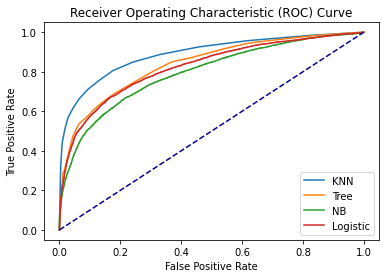

In [90]:
plt.plot(fpr1, tpr1, label= "KNN")
plt.plot(fpr2, tpr2, label= "Tree")
plt.plot(fpr3, tpr3, label= "NB")
plt.plot(fpr4, tpr4, label= "Logistic")    

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### Prediction Data set

In [159]:
df2 = pd.read_csv('prediction.csv')
df2.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Price,NewUsed,Category,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Shipping delay in days,Arrival delay in days
0,0,928P866c,Male,Premium,37.0,18.71,New,Home/Kitchen,1,1,5,3,5,2,2,5,5,0,0
1,1,728V461t,Female,Premium,49.0,110.89,Used,Technology,4,5,3,2,2,2,3,2,3,0,0
2,2,087W387u,Male,Premium,57.0,84.82,New,Home/Kitchen,2,2,4,2,2,2,4,2,5,0,0
3,3,284H293x,Female,Premium,53.0,65.35,New,Technology,5,1,3,5,5,5,4,4,3,0,0
4,4,947J480l,Female,Premium,56.0,284.60,New,Technology,3,3,4,5,5,5,2,5,1,0,0


In [160]:
df2['Age'].fillna(value=df2['Age'].mean(), inplace=True)

In [164]:
df2_categorical=df2.select_dtypes(include=['object'])
df2_numerical=df2.select_dtypes(include=['int64','float'])

dummies3 = pd.get_dummies(df2_categorical[['Gender', 'Customer Type', 'NewUsed','Category']],drop_first=True) 

df2_numerical['logprice']=df_numerical['Price'].apply(math.log)

scaled_df2 = pd.DataFrame(scaler.transform(df2_numerical))
scaled_df2.columns = df2_numerical.columns

X2_numerical=scaled_df2[['Age','Product description accuracy','Manufacturer sustainability','Packaging quality','Additional options','Helpfulness of reviews and ratings','Integrity of packaging','Integrity of packaging','Ease check-out procedure','Relevance of related products','Costumer insurance','Shipping delay in days','Arrival delay in days','logprice']]
X2=pd.concat([dummies3,X2_numerical], axis = 1)

In [165]:
X.columns

Index(['Gender_Male', 'Customer Type_Premium', 'NewUsed_Used',
       'Category_Home/Kitchen', 'Category_Other', 'Category_Sport',
       'Category_Technology', 'Age', 'Product description accuracy',
       'Manufacturer sustainability', 'Packaging quality',
       'Additional options', 'Helpfulness of reviews and ratings',
       'Integrity of packaging', 'Integrity of packaging',
       'Ease check-out procedure', 'Relevance of related products',
       'Costumer insurance', 'Shipping delay in days', 'Arrival delay in days',
       'logprice'],
      dtype='object')

In [166]:
X2

,Gender_Male,Customer Type_Premium,NewUsed_Used,Category_Home/Kitchen,Category_Other,Category_Sport,Category_Technology,Age,Product description accuracy,Manufacturer sustainability,...,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Shipping delay in days,Arrival delay in days,logprice
0,1,1,0,1,0,0,0,-0.353974,-1.349641,-1.548603,...,-0.284102,1.264399,-1.372540,-1.372540,-1.026803,1.163755,1.314009,-0.267126,-0.270382,-0.732875
1,0,1,1,0,0,0,1,0.569073,0.614787,1.583178,...,-1.059700,-1.014427,-1.372540,-1.372540,-0.237282,-1.388675,-0.206078,-0.267126,-0.270382,1.429179
2,1,1,0,1,0,0,0,1.184437,-0.694831,-0.765658,...,-1.059700,-1.014427,-1.372540,-1.372540,0.552238,-1.388675,1.314009,-0.267126,-0.270382,1.364754
3,0,1,0,0,0,0,1,0.876755,1.269597,-1.548603,...,1.267095,1.264399,1.167069,1.167069,0.552238,0.312945,-0.206078,-0.267126,-0.270382,0.077508
4,0,1,0,0,0,0,1,1.107517,-0.040022,0.017287,...,1.267095,1.264399,1.167069,1.167069,-1.026803,1.163755,-1.726166,-0.267126,-0.270382,-1.216308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,1,0,0,0,1,0,1.030596,-1.349641,-1.548603,...,-0.284102,-0.254818,-0.526004,-0.526004,1.341758,-0.537865,-0.206078,-0.267126,-0.270382,-1.361618
19996,0,1,0,0,0,0,0,-0.277054,-2.004450,0.800233,...,-1.835298,-1.774035,-2.219077,-2.219077,1.341758,-2.239485,1.314009,-0.267126,-0.270382,-0.974146
19997,0,0,0,0,0,0,1,-1.200101,-0.694831,0.800233,...,1.267095,-0.254818,0.320533,0.320533,1.341758,0.312945,-0.966122,-0.267126,-0.270382,0.049701
19998,0,1,0,0,0,0,1,0.415231,1.269597,0.017287,...,-0.284102,0.504790,0.320533,0.320533,1.341758,0.312945,1.314009,-0.267126,-0.270382,0.733098


In [167]:
X2['Target']=0

In [168]:
X2

,Gender_Male,Customer Type_Premium,NewUsed_Used,Category_Home/Kitchen,Category_Other,Category_Sport,Category_Technology,Age,Product description accuracy,Manufacturer sustainability,...,Helpfulness of reviews and ratings,Integrity of packaging,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Shipping delay in days,Arrival delay in days,logprice,Target
0,1,1,0,1,0,0,0,-0.353974,-1.349641,-1.548603,...,1.264399,-1.372540,-1.372540,-1.026803,1.163755,1.314009,-0.267126,-0.270382,-0.732875,0
1,0,1,1,0,0,0,1,0.569073,0.614787,1.583178,...,-1.014427,-1.372540,-1.372540,-0.237282,-1.388675,-0.206078,-0.267126,-0.270382,1.429179,0
2,1,1,0,1,0,0,0,1.184437,-0.694831,-0.765658,...,-1.014427,-1.372540,-1.372540,0.552238,-1.388675,1.314009,-0.267126,-0.270382,1.364754,0
3,0,1,0,0,0,0,1,0.876755,1.269597,-1.548603,...,1.264399,1.167069,1.167069,0.552238,0.312945,-0.206078,-0.267126,-0.270382,0.077508,0
4,0,1,0,0,0,0,1,1.107517,-0.040022,0.017287,...,1.264399,1.167069,1.167069,-1.026803,1.163755,-1.726166,-0.267126,-0.270382,-1.216308,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,1,0,0,0,1,0,1.030596,-1.349641,-1.548603,...,-0.254818,-0.526004,-0.526004,1.341758,-0.537865,-0.206078,-0.267126,-0.270382,-1.361618,0
19996,0,1,0,0,0,0,0,-0.277054,-2.004450,0.800233,...,-1.774035,-2.219077,-2.219077,1.341758,-2.239485,1.314009,-0.267126,-0.270382,-0.974146,0
19997,0,0,0,0,0,0,1,-1.200101,-0.694831,0.800233,...,-0.254818,0.320533,0.320533,1.341758,0.312945,-0.966122,-0.267126,-0.270382,0.049701,0
19998,0,1,0,0,0,0,1,0.415231,1.269597,0.017287,...,0.504790,0.320533,0.320533,1.341758,0.312945,1.314009,-0.267126,-0.270382,0.733098,0


In [169]:
X2.isnull().sum()/X2.count()*100

Gender_Male                           0.0
Customer Type_Premium                 0.0
NewUsed_Used                          0.0
Category_Home/Kitchen                 0.0
Category_Other                        0.0
Category_Sport                        0.0
Category_Technology                   0.0
Age                                   0.0
Product description accuracy          0.0
Manufacturer sustainability           0.0
Packaging quality                     0.0
Additional options                    0.0
Helpfulness of reviews and ratings    0.0
Integrity of packaging                0.0
Integrity of packaging                0.0
Ease check-out procedure              0.0
Relevance of related products         0.0
Costumer insurance                    0.0
Shipping delay in days                0.0
Arrival delay in days                 0.0
logprice                              0.0
Target                                0.0
dtype: float64

In [170]:
dummies2 = pd.get_dummies(df_categorical[['Gender', 'Customer Type', 'NewUsed','Category']],drop_first=True)  
dummies3 = pd.get_dummies(df2_categorical[['Gender', 'Customer Type', 'NewUsed','Category']],drop_first=True) 


X=pd.concat([dummies2,X_numerical], axis=1)
X2=pd.concat([dummies3,X2_numerical], axis=1)

In [171]:
print(X.columns)
print(X2.columns)

Index(['Gender_Male', 'Customer Type_Premium', 'NewUsed_Used',
       'Category_Home/Kitchen', 'Category_Other', 'Category_Sport',
       'Category_Technology', 'Age', 'Product description accuracy',
       'Manufacturer sustainability', 'Packaging quality',
       'Additional options', 'Helpfulness of reviews and ratings',
       'Integrity of packaging', 'Integrity of packaging',
       'Ease check-out procedure', 'Relevance of related products',
       'Costumer insurance', 'Shipping delay in days', 'Arrival delay in days',
       'logprice'],
      dtype='object')
Index(['Gender_Male', 'Customer Type_Premium', 'NewUsed_Used',
       'Category_Home/Kitchen', 'Category_Other', 'Category_Sport',
       'Category_Technology', 'Age', 'Product description accuracy',
       'Manufacturer sustainability', 'Packaging quality',
       'Additional options', 'Helpfulness of reviews and ratings',
       'Integrity of packaging', 'Integrity of packaging',
       'Ease check-out procedure', 'Rele

In [172]:
X2.isna().sum()/X2.count()*100


Gender_Male                           0.0
Customer Type_Premium                 0.0
NewUsed_Used                          0.0
Category_Home/Kitchen                 0.0
Category_Other                        0.0
Category_Sport                        0.0
Category_Technology                   0.0
Age                                   0.0
Product description accuracy          0.0
Manufacturer sustainability           0.0
Packaging quality                     0.0
Additional options                    0.0
Helpfulness of reviews and ratings    0.0
Integrity of packaging                0.0
Integrity of packaging                0.0
Ease check-out procedure              0.0
Relevance of related products         0.0
Costumer insurance                    0.0
Shipping delay in days                0.0
Arrival delay in days                 0.0
logprice                              0.0
dtype: float64

In [176]:
y2_pred = model_tree.predict(X2)
print(y2_pred)

[0 0 1 ... 0 0 0]


In [179]:
df2['Target'] = y2_pred

In [180]:
df2['Target'].value_counts()

0    14171
1     5829
Name: Target, dtype: int64

In [181]:
df2.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Price,NewUsed,Category,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Shipping delay in days,Arrival delay in days,Target
0,0,928P866c,Male,Premium,37.0,18.71,New,Home/Kitchen,1,1,5,3,5,2,2,5,5,0,0,0
1,1,728V461t,Female,Premium,49.0,110.89,Used,Technology,4,5,3,2,2,2,3,2,3,0,0,0
2,2,087W387u,Male,Premium,57.0,84.82,New,Home/Kitchen,2,2,4,2,2,2,4,2,5,0,0,1
3,3,284H293x,Female,Premium,53.0,65.35,New,Technology,5,1,3,5,5,5,4,4,3,0,0,1
4,4,947J480l,Female,Premium,56.0,284.60,New,Technology,3,3,4,5,5,5,2,5,1,0,0,0


In [182]:
df2.to_csv (r'C:\Users\vasil\OneDrive\Desktop\Philippou_Debs.csv', index = False, header=True)
